In [16]:
import pandas as pd
import torch
import torchvision
from torchvision.transforms import transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
import comet_ml

In [ ]:
experiment = comet_ml.Experiment(
    api_key="y8k3M367nG7VDtHSJERhGKWdQ",
    project_name="face-landmarks-recognition", 
    workspace="zenunicorn",
    log_code=True)

In [2]:
label_data = pd.read_csv("facial_keypoints.csv")
label_data.head(5)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [3]:
label_data.shape

(7049, 30)

In [4]:
label_data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [5]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [6]:
label_data = label_data.dropna()
label_index = label_data.index

full_label = label_data.values
full_label

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [68.43086625, 38.65197512, 28.89585706, ..., 79.04312978,
        47.17673868, 89.54452244],
       [64.15217959, 30.69159184, 27.00089796, ..., 79.30142857,
        58.61108571, 80.35554286],
       [66.6837551 , 34.48342857, 30.7844898 , ..., 75.96359236,
        52.92337132, 82.66106175]])

In [7]:
image_data = np.load("face_images.npz")
image_data = image_data["face_images"]
image_data = np.transpose(image_data,(2,0,1))

full_image = np.expand_dims(image_data[label_index],1)
full_image

array([[[[238., 236., 237., ..., 250., 250., 250.],
         [235., 238., 236., ..., 249., 250., 251.],
         [237., 236., 237., ..., 251., 251., 250.],
         ...,
         [186., 183., 181., ...,  52.,  57.,  60.],
         [189., 188., 207., ...,  61.,  69.,  78.],
         [191., 184., 184., ...,  70.,  75.,  90.]]],


       [[[219., 215., 204., ...,  92.,  88.,  84.],
         [222., 219., 220., ...,  92.,  88.,  86.],
         [231., 224., 212., ...,  77.,  80.,  84.],
         ...,
         [  1.,   1.,   1., ...,   1.,   1.,   1.],
         [  1.,   1.,   1., ...,   1.,   1.,   1.],
         [  1.,   1.,   1., ...,   1.,   1.,   1.]]],


       [[[144., 142., 159., ..., 208., 207., 207.],
         [143., 142., 161., ..., 208., 208., 207.],
         [143., 140., 160., ..., 209., 209., 207.],
         ...,
         [ 66.,  70.,  69., ...,  81., 134., 194.],
         [ 65.,  69.,  71., ...,  75.,  83., 109.],
         [ 65.,  68.,  70., ...,  78.,  78.,  77.]]],


       ...

In [8]:
X_train,X_test,y_train,y_test = train_test_split(full_image,full_label,test_size = 0.1)

In [9]:
class FaceDataset(torch.utils.data.Dataset):
    def __init__(self,image,label):
        self.image = image
        self.label = label
        
    def __len__(self):
        return len(self.image)
    
    def __getitem__(self,idx):
        image = self.image[idx] / 255.
        label = self.label[idx] / 96.
        
        image = torch.as_tensor(image,dtype = torch.float32)
        label = torch.as_tensor(label,dtype = torch.float32)
        
        return image,label
        

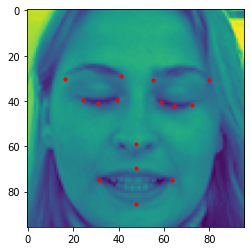

<Figure size 432x288 with 0 Axes>

In [10]:
test_image = FaceDataset(X_train,y_train)


def pltshower(image,label,idx):
    
    x = label[idx][1].reshape(15,2)[0:,0] *96
    y = label[idx][1].reshape(15,2)[0:,1] *96

    img = image[idx][0]
    img = np.transpose(img,(1,2,0))

    plt.imshow(img)
    
    plt.scatter(x,y,c = "red", s = 10)
    plt.figure()
    
        
    
for i in range(1):
    
    pltshower(test_image,test_image,i)   

In [11]:
train_loader = torch.utils.data.DataLoader(FaceDataset(X_train,y_train),shuffle = True,batch_size = 32)
test_loader  = torch.utils.data.DataLoader(FaceDataset(X_test,y_test), shuffle = False, batch_size = 32)

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
class ConvNet(nn.Module):
    def __init__(self,out_class):
        super(ConvNet,self).__init__()
        
        self.conv = nn.Conv2d(1,32,kernel_size = 4)
        self.batch = nn.BatchNorm2d(num_features = 32)
        self.rel = nn.ReLU()
        self.maxp = nn.MaxPool2d(kernel_size = 2)
        self.drop = nn.Dropout(0.6)
        
        self.conv2 = nn.Conv2d(32,64,kernel_size = 4)
        self.batch2 = nn.BatchNorm2d(num_features = 64)
        self.rel2 = nn.ReLU()
        self.maxp2 = nn.MaxPool2d(kernel_size = 2)
        self.drop2 = nn.Dropout(0.6)
        
        
        
        self.flat = nn.Flatten()
        self.fc = nn.Linear(64*21*21,out_class)
        
        
    def forward(self,x):
        x = self.conv(x)
        x = self.batch(x)
        x = self.rel(x)
        x = self.maxp(x)
        x = self.drop(x)
        
        x = self.conv2(x)
        x = self.batch2(x)
        x = self.rel2(x)
        x = self.maxp2(x)
        x = self.drop2(x)
        
        #print(np.shape(x))
        x = self.flat(x)
        x = self.fc(x)
        x = F.sigmoid(x)
        
        return x

In [14]:
epoch = 30
model = ConvNet(30).to(device)
optimizer = torch.optim.AdamW(model.parameters(),lr = 0.0003)
criterion = nn.L1Loss()

In [15]:
test_loss_graph = []
train_loss_graph = []
for epochs in range(epoch):
    model.train()
    train_loss_inf = 0
    test_loss_inf = 0
    
    for image,label in train_loader:
        
        
        image,label = image.to(device),label.to(device)
        
        output = model(image)
        
        loss = criterion(output,label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss_inf += loss.item() * image.size(0)
    
    model.eval()
    for test_image,test_label in test_loader:
        test_image,test_label = test_image.to(device),test_label.to(device)
        
        output = model(test_image)
        test_loss = criterion(output,test_label)
        
        test_loss_inf += test_loss.item() * test_image.size(0)
    train_loss_graph.append(train_loss_inf / len(X_train)) 
    test_loss_graph.append(test_loss_inf / len(X_test))
    print(f"Epoch: {epochs}/{epoch} Train Loss: {train_loss_inf / len(X_train)}  Test Loss: {test_loss_inf / len(X_test)}")
    torch.save(model.state_dict(),"model.pt")    
    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0/30 Train Loss: 0.2934691440217344  Test Loss: 0.25415412343551064
Epoch: 1/30 Train Loss: 0.23610858755381556  Test Loss: 0.2049387597313551
Epoch: 2/30 Train Loss: 0.18130575810575536  Test Loss: 0.1547003661360696
Epoch: 3/30 Train Loss: 0.16557335257839687  Test Loss: 0.13396640692915873
Epoch: 4/30 Train Loss: 0.1504249052219054  Test Loss: 0.14458184139193775
Epoch: 5/30 Train Loss: 0.15242432667520806  Test Loss: 0.12589063544139684
Epoch: 6/30 Train Loss: 0.14302723261364275  Test Loss: 0.12763567853753813
Epoch: 7/30 Train Loss: 0.13580513237235703  Test Loss: 0.11527524735325965
Epoch: 8/30 Train Loss: 0.13137235383378382  Test Loss: 0.11246384568860597
Epoch: 9/30 Train Loss: 0.1261016679608562  Test Loss: 0.0965487270433212
Epoch: 10/30 Train Loss: 0.12563365538481736  Test Loss: 0.09720068954140226
Epoch: 11/30 Train Loss: 0.11809520359970203  Test Loss: 0.08253436932496935
Epoch: 12/30 Train Loss: 0.11094852051816625  Test Loss: 0.0854481438470778
Epoch: 13/30 Tra

<Figure size 432x288 with 0 Axes>

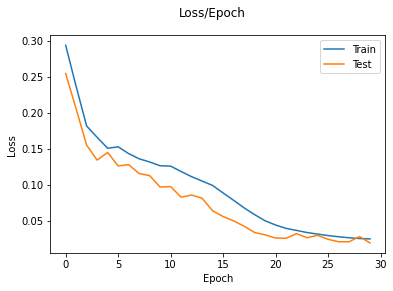

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(train_loss_graph)
plt.plot(test_loss_graph)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.suptitle("Loss/Epoch")
plt.legend(["Train","Test"])
plt.figure()

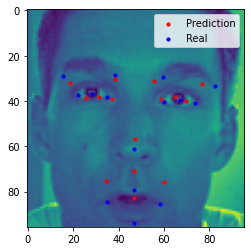

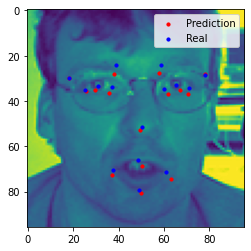

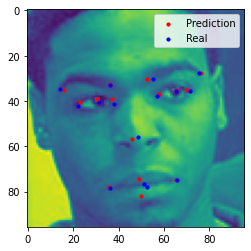

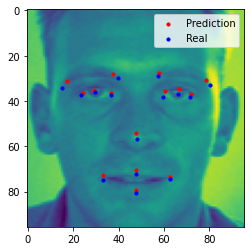

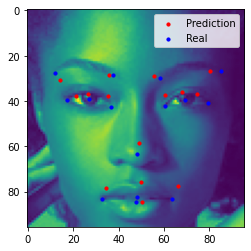

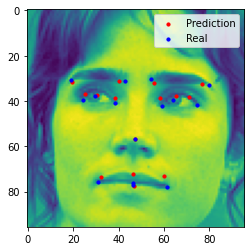

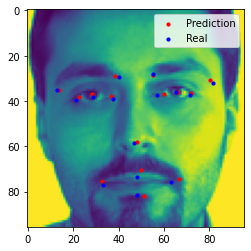

<Figure size 432x288 with 0 Axes>

In [18]:
model = model.to("cpu")
with torch.no_grad():
    
    model.eval()
    for i,(img,label) in enumerate(test_loader):
        output = model(img)
        output = output[i].reshape(15,2)
        real_label = label[i].reshape(15,2)
        
        
        image = img[i]
        image = np.transpose(image,(1,2,0))
        plt.imshow(image*255)
        plt.scatter(output[0:,0]*96,output[0:,1]*96,c="red",s = 10)
        
        plt.scatter(real_label[0:,0]*96,real_label[0:,1]*96,c="blue",s = 10)
        plt.legend(["Prediction","Real"])#blue : Prediction
        
        plt.figure()